In [ ]:
# Question 6: Custom Autoencoder Model for Complex Dataset
# Description: Build a custom autoencoder for a more complex dataset, like CIFAR-10.

2025-05-05 12:37:30.860302: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-05 12:37:31.125765: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-05 12:37:31.264377: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746448651.566382   29101 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746448651.662915   29101 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1746448652.329535   29101 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

Epoch 1/2


2025-05-05 12:37:44.003600: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step - loss: 0.5962

2025-05-05 12:39:35.329369: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.
2025-05-05 12:39:35.749522: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.


391/391 ━━━━━━━━━━━━━━━━━━━━ 122s 308ms/step - loss: 0.5961 - val_loss: 0.5636
Epoch 2/2
391/391 ━━━━━━━━━━━━━━━━━━━━ 119s 305ms/step - loss: 0.5619 - val_loss: 0.5606
  1/313 ━━━━━━━━━━━━━━━━━━━━ 46s 149ms/step

2025-05-05 12:42:08.567887: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.


313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 55ms/step


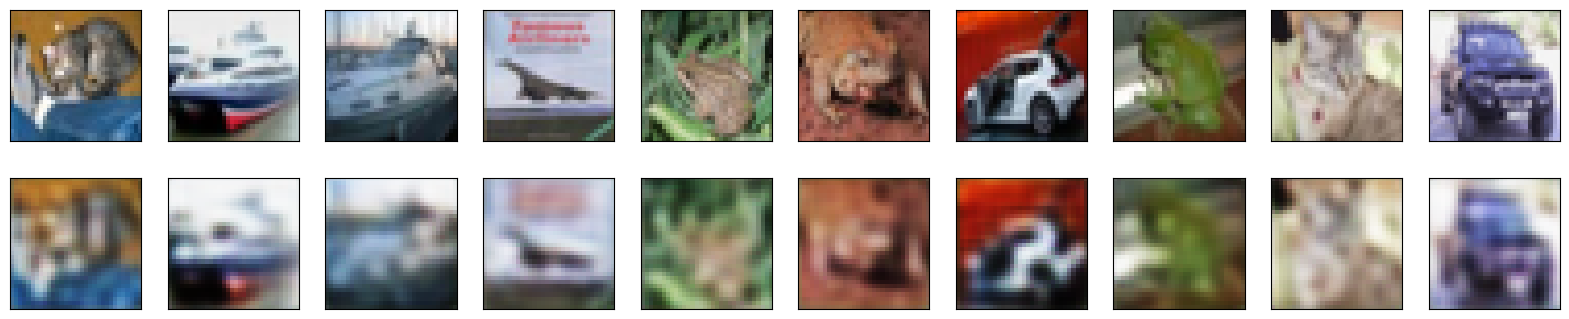

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import backend as K
from sklearn.preprocessing import MinMaxScaler

# Load CIFAR-10 dataset
(x_train, _), (x_test, _) = cifar10.load_data()

# Normalize the images to range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape the images
x_train = x_train.reshape((x_train.shape[0], 32, 32, 3))
x_test = x_test.reshape((x_test.shape[0], 32, 32, 3))

# Build the autoencoder model

# Encoder
input_img = layers.Input(shape=(32, 32, 3))
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

# Autoencoder Model
autoencoder = models.Model(input_img, decoded)

# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the model
autoencoder.fit(x_train, x_train,
                epochs=2,
                batch_size=128,
                validation_data=(x_test, x_test))

# Evaluate and predict
decoded_imgs = autoencoder.predict(x_test)

# Plot original vs reconstructed images
n = 10  # number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()   